In [1]:
import mysql.connector as mysql
import pandas as pd

In [2]:
"""cursor.execute("SHOW DATABASES")

for x in cursor:
  print(x)"""

'cursor.execute("SHOW DATABASES")\n\nfor x in cursor:\n  print(x)'

In [3]:
db = mysql.connect(host="10.177.6.142", user="remote_user", passwd="_Dr!mdhUn7evfsnvZoxLA3!jXCbqrV", database="popular_movies")
cursor = db.cursor()

query = "SELECT * FROM movies;" ## Read from DB
cursor.execute(query)

df = pd.DataFrame(list(cursor), columns=['id', 'title', 'year'])

#for entry in cursor:
#    print(list(entry))

In [4]:
df.head(30)

,id,title,year
0,1,Toy Story (1995),1995
1,2,Jumanji (1995),1995
2,3,Grumpier Old Men (1995),1995
3,4,Waiting to Exhale (1995),1995
4,5,Father of the Bride Part II (1995),1995
5,6,Heat (1995),1995
6,7,Sabrina (1995),1995
7,8,Tom and Huck (1995),1995
8,9,Sudden Death (1995),1995
9,10,GoldenEye (1995),1995


In [5]:
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [6]:
username='remote_user'
password= '_Dr!mdhUn7evfsnvZoxLA3!jXCbqrV'
domain='10.177.6.142'
database='popular_movies'

db_connection_str = f"mysql+pymysql://{username}:{password}@{domain}/{database}"
db_connection = create_engine(db_connection_str)

In [7]:
df = pd.read_sql('SELECT * FROM movies ORDER BY release_year', con=db_connection)

In [8]:
df.head(400)

,movieId,title,release_year
0,183665,The Moors Murders,-1
1,183709,Harvest,-1
2,183755,Basmati Blues,-1
3,183837,The Favourite,-1
4,183855,Terminal,-1
...,...,...,...
395,187379,Colleurs d'affiches (1897),1897
396,192967,Football (1897),1897
397,167504,"Fifth Avenue, New York (1897)",1897
398,167508,Mr. Edison at Work in His Chemical Laboratory ...,1897


<BarContainer object of 135 artists>

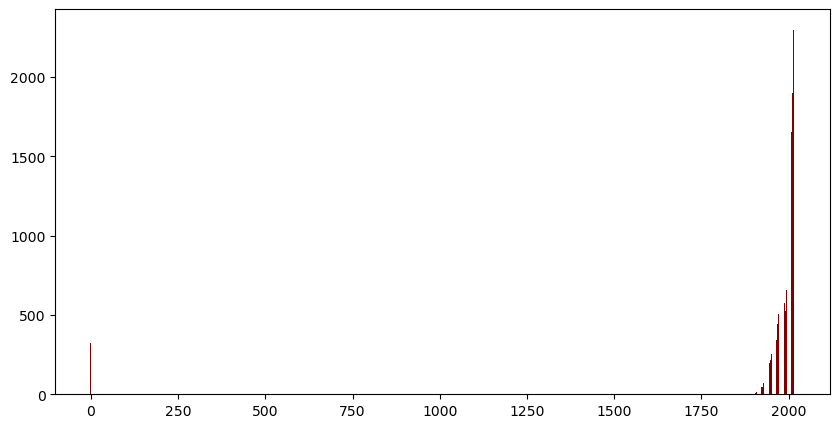

In [9]:
fig = plt.figure(figsize = (10, 5))

year = pd.DataFrame(df['release_year'].drop_duplicates())
count = df.groupby(['release_year'])['movieId'].count()


year_count = pd.merge(year, count, on=["release_year", "release_year"])
year_count.rename(columns = {'movieId':'count'}, inplace=True)
 
plt.bar(year_count['release_year'], year_count['count'], color ='maroon',
      width = 0.4)

